In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import spacy
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [4]:
df.isnull().sum() # to check missing values

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

In [5]:
df['release_date'] = pd.to_datetime(df['Release Date'])
df['netflix_release']= pd.to_datetime(df['Netflix Release Date'])
useless_cols = ['Image', 'Poster', 'TMDb Trailer', 'Trailer Site', 'Netflix Link', 'IMDb Link','Release Date',
                'Netflix Release Date', 'Production House', 'Summary']
df.drop(columns=useless_cols, inplace=True)

In [6]:
df['View Rating'].sort_values().unique()

array(['AL', 'Approved', 'E', 'E10+', 'G', 'GP', 'M', 'M/PG', 'MA-17',
       'NC-17', 'NOT RATED', 'Not Rated', 'PG', 'PG-13', 'Passed', 'R',
       'TV-13', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7',
       'TV-Y7-FV', 'U', 'UNRATED', 'Unrated', 'X', nan], dtype=object)

In [7]:
df.release_date.max() # latest release

Timestamp('2022-10-14 00:00:00')

In [8]:
df.release_date.min() # earliest release

Timestamp('1910-04-25 00:00:00')

In [9]:
rating_mapping = {
    'AL': 'G',
    'Approved': 'G',
    'E': 'G',
    'E10+': 'G',
    'G': 'G',
    'GP': 'PG',
    'M': 'R',
    'M/PG': 'PG-13',
    'MA-17': 'R',
    'NC-17': 'R',
    'NOT RATED': 'NR',
    'Not Rated': 'NR',
    'PG': 'PG',
    'PG-13': 'PG-13',
    'Passed': 'G',
    'R': 'R',
    'TV-13': 'PG-13',
    'TV-14': 'PG-13',
    'TV-G': 'G',
    'TV-MA': 'R',
    'TV-PG': 'PG',
    'TV-Y': 'G',
    'TV-Y7': 'G',
    'TV-Y7-FV': 'G',
    'U': 'G',
    'UNRATED': 'NR',
    'Unrated': 'NR',
    'X': 'R',
    'nan': 'NR'
}

# Замените значения в столбце 'View Rating' согласно словарю
df['View Rating'] = df['View Rating'].replace(rating_mapping)

In [10]:
df.rename(columns={'View Rating': 'view_rating'}, inplace=True)

In [11]:
df.view_rating.fillna('NR', inplace=True) 
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,view_rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,release_date,netflix_release
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",205926.0,2008-12-12,2021-03-04
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,R,5.8,79.0,69.0,1.0,NaN,"$70,632",2838.0,2020-05-08,2021-03-04
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,NR,4.3,NaN,46.0,NaN,NaN,"$16,263",1720.0,2020-08-28,2021-03-04
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,NR,6.5,NaN,NaN,1.0,NaN,NaN,1147.0,2016-10-01,2021-03-04
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,NR,6.3,NaN,NaN,NaN,4.0,NaN,63.0,2011-09-22,2021-03-04


### Description:
**Title**: The name of the movie / series  
**Genre**: Genre(s) of the movie / series  
**Tags**: List of tags on the movie / series  
**Languages**: Available languages  
**Series or Movie**: TV Show/Series or a movie  
**Hidden Gem Score**: Score given to the product  
**Country Availability**:  List of countries where film / series is available  
**Runtime**: Duration of the movie or an episode of the series  
**Director**: Director of this product  
**Writer**: Writer of this product  
**Actors**: Main actors of this product  
**View Rating**: Indicates the rating of the product:
- "G" - General Audiences (for everyone, all ages)
- "PG" Parental Guidance Suggested (recommended for children under 13, parental guidance is advised)
- "PG-13" - Parents Strongly Cautioned (recommended for children over 13, parental guidance is strongly advised)
- "R" - Restricted (viewing restricted to viewers over 17 years old unless accompanied by an adult)
- "NR" - Not Rated (no official rating available)   

**IMDb Score**: Score given to the product by IMDb  
**Rotten Tomatoes Score**: Score given to the product by Rotten Tomatoes  
**Metacritic Score**: Score given to the product by Metacritic  
**Awards Received**: Number of awards this film/serie has received  
**Awards Nominated For**: Number of awards this film/movie has been nominated  
**MDb Votes**: Scores given by IMDb  
**release_date**: When this product has been released  
**netflix_release**: When this product has been released on Netflix  
**MDb Votes**: Scores given by IMDb  

## Number of Movies and Series/TV Shows

In [12]:
df['Series or Movie'].value_counts()

Movie     11697
Series     3783
Name: Series or Movie, dtype: int64

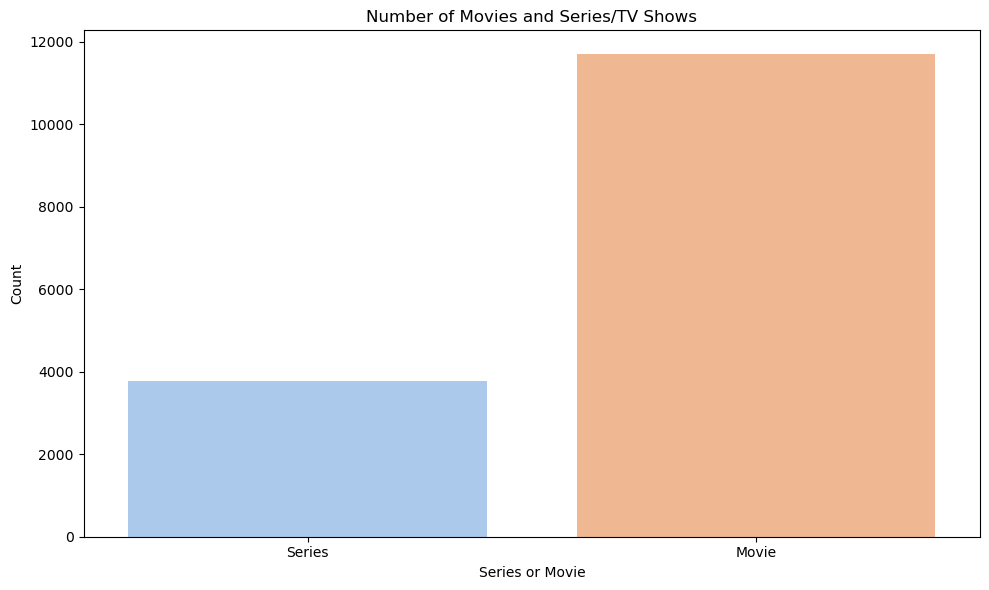

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Series or Movie', data=df, palette='pastel')

plt.ylabel('Count')
plt.title('Number of Movies and Series/TV Shows')

plt.tight_layout()
plt.show()

#### There are three times more movies than series in this dataset

In [14]:
df_series = df[df["Series or Movie"] == "Series"] # df only Series/TV Shows
df_series.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,view_rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,release_date,netflix_release
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",205926.0,2008-12-12,2021-03-04
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,NR,6.5,NaN,NaN,1.0,NaN,NaN,1147.0,2016-10-01,2021-03-04
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,NR,7.5,NaN,NaN,2.0,4.0,NaN,47.0,2011-06-14,2021-03-03
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,NaN,NaN,...,NR,3.9,NaN,NaN,NaN,NaN,NaN,107.0,2011-03-03,2021-03-03
23,Girls und Panzer das Finale,"Animation, Action, Comedy","Drama Anime,Action & Adventure,Action Anime,An...",Japanese,Series,8.5,Japan,< 30 minutes,Tsutomu Mizushima,Reiko Yoshida,...,NR,7.3,NaN,NaN,NaN,NaN,NaN,210.0,2017-12-09,2021-03-02


In [15]:
df_movie = df[df['Series or Movie']=='Movie'] # df only movies
df_movie.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,view_rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,release_date,netflix_release
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,R,5.8,79.0,69.0,1.0,NaN,"$70,632",2838.0,2020-05-08,2021-03-04
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,NR,4.3,NaN,46.0,NaN,NaN,"$16,263",1720.0,2020-08-28,2021-03-04
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,NR,6.3,NaN,NaN,NaN,4.0,NaN,63.0,2011-09-22,2021-03-04
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...",...,NR,7.4,NaN,NaN,NaN,NaN,NaN,131.0,2020-12-03,2021-03-03
8,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,NR,6.7,NaN,NaN,2.0,1.0,NaN,88.0,1949-10-31,2021-03-03


## Number of Movies and Series/TV Shows by View Rating

In [16]:
df_series.view_rating.value_counts()

NR       2070
R         631
PG-13     527
G         326
PG        229
Name: view_rating, dtype: int64

In [17]:
df_movie.view_rating.value_counts()

NR       6394
R        2616
PG-13    1646
PG        763
G         278
Name: view_rating, dtype: int64

In [18]:
df_ser_view_rate = df_series[df_series['view_rating'] != 'NR'] # for viz
df_mov_view_rate = df_movie[df_movie['view_rating'] != 'NR']

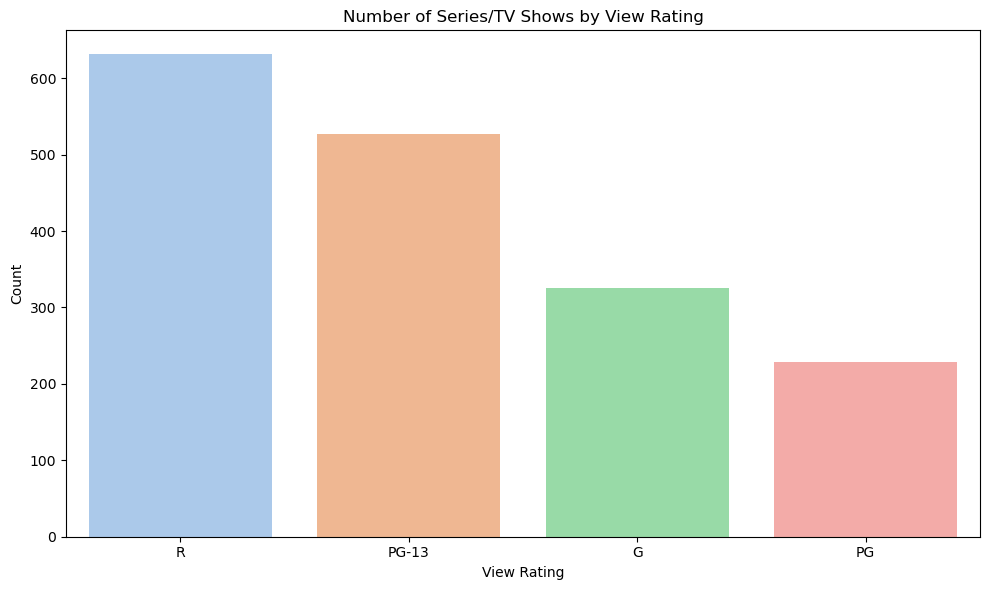

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='view_rating', data=df_ser_view_rate, palette='pastel')

plt.ylabel('Count')
plt.xlabel('View Rating')
plt.title('Number of Series/TV Shows by View Rating')

plt.tight_layout()
plt.show()

#### Most of the Series/TV Shows are made for viewers over 13 years 

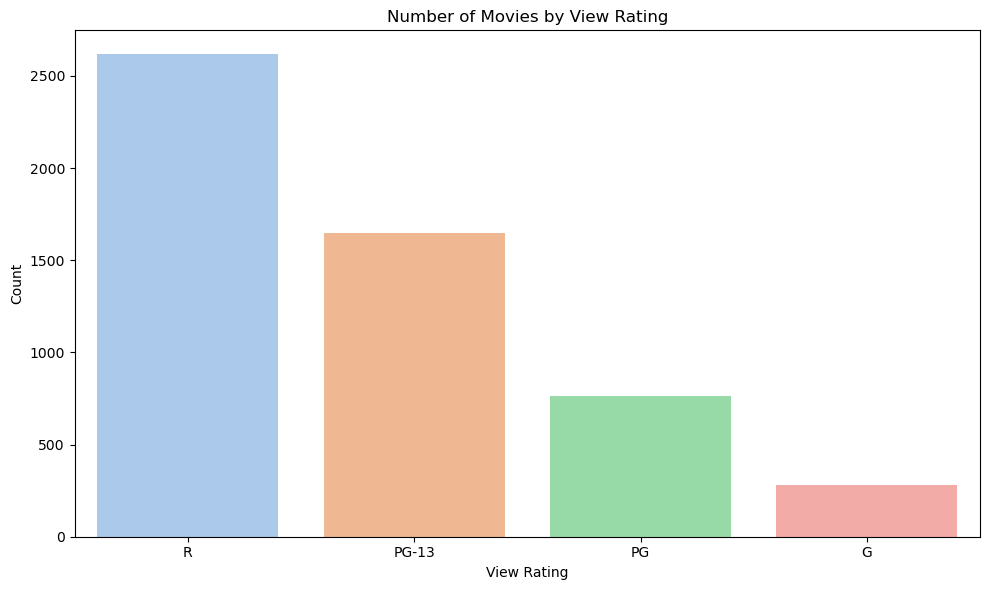

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='view_rating', data=df_mov_view_rate, palette='pastel')

plt.ylabel('Count')
plt.xlabel('View Rating')
plt.title('Number of Movies by View Rating')

plt.tight_layout()
plt.show()

#### There are very few movies with no age restrictions

## The most popular Genres for Movies and Series/TV Shows

In [21]:
df_series.Genre.fillna('unknown', inplace=True) # replace NaN with unknown

/var/folders/th/zkxn724n2s12m0g5bscf4trh0000gp/T/ipykernel_63350/4258622644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series.Genre.fillna('unknown', inplace=True) # replace NaN with unknown


In [22]:
genre_freq = {}

# new df where in one row will be only one genre
genre_df = df.assign(Genre=df_series['Genre'].str.split(', ')).explode('Genre')

genre_freq = genre_df['Genre'].value_counts().reset_index() # Frequency of genres
genre_freq.columns = ['Genre', 'Frequency']

top10_gen = genre_freq[genre_freq['Genre'] != 'unknown'] # for viz
top10_gen = top10_gen[0:10] # top 10 genres

genre_freq 

,Genre,Frequency
0,Drama,1400
1,Comedy,1110
2,Animation,877
3,Action,562
4,Romance,561
5,Fantasy,537
6,unknown,527
7,Adventure,445
8,Crime,436
9,Thriller,425


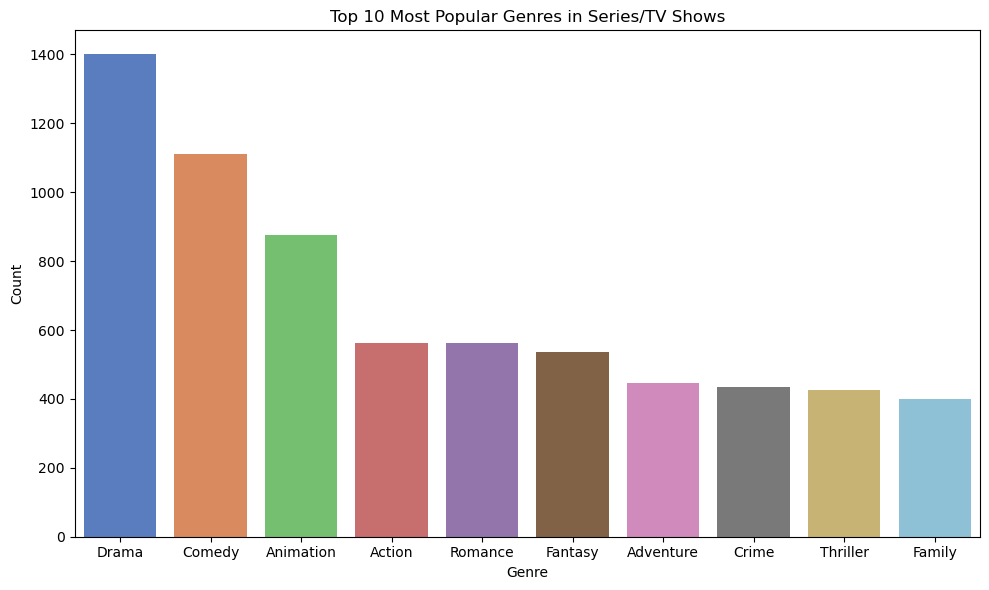

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y= 'Frequency', data=top10_gen, palette='muted')

plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres in Series/TV Shows')

plt.tight_layout()
plt.show()

### The most popular series genres are:
- Drama
- Comedy
- Animation

In [24]:
df_movie.Genre.fillna('unknown', inplace=True) # replace NaN with unknown

/var/folders/th/zkxn724n2s12m0g5bscf4trh0000gp/T/ipykernel_63350/1588670638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.Genre.fillna('unknown', inplace=True) # replace NaN with unknown


In [25]:
genre_freq2 = {}

# new df where in one row will be only one genre
genre_df2 = df.assign(Genre=df_movie['Genre'].str.split(', ')).explode('Genre')

genre_freq2 = genre_df2['Genre'].value_counts().reset_index() # Frequency of genres
genre_freq2.columns = ['Genre', 'Frequency']

top_10_s_gen2 = genre_freq2[genre_freq2['Genre'] != 'unknown'] # for viz
top_10_s_gen2 = top_10_s_gen2[0:10] # top 10 genres

genre_freq2

,Genre,Frequency
0,Drama,4959
1,Comedy,3967
2,Thriller,2314
3,Action,2248
4,Romance,1884
5,Crime,1496
6,Adventure,1364
7,unknown,1183
8,Fantasy,1057
9,Family,1032


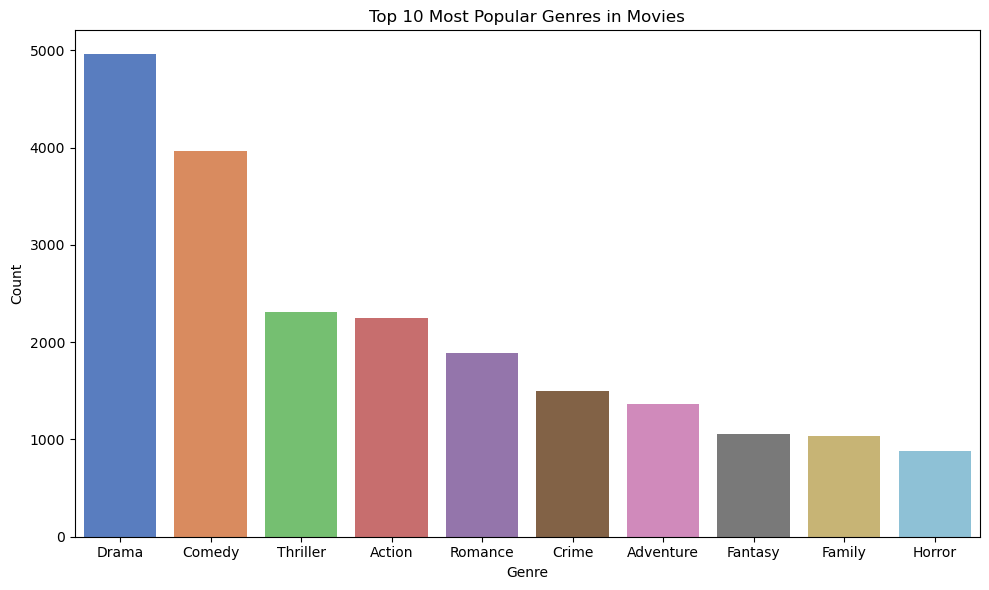

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y= 'Frequency', data=top_10_s_gen2, palette='muted')

plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres in Movies')

plt.tight_layout()
plt.show()

### The most popular movie genres are:
- Drama
- Comedy
- Thriller

## The most popular Tags

In [27]:
df_series_tag = df_series.dropna(subset=['Tags'])
df_movies_tag = df_movie.dropna(subset=['Tags'])

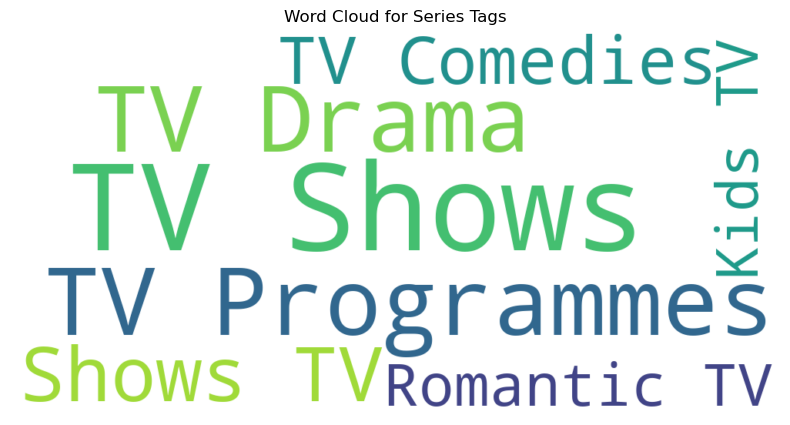

In [28]:
tags_text = " ".join(df_series_tag['Tags'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis', max_words=7).generate(tags_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Series Tags')
plt.show()

### The most popular series tags are:
- TV Programmes
- TV Shows 
- TV Drama
- TV Comedies
- Kids TV

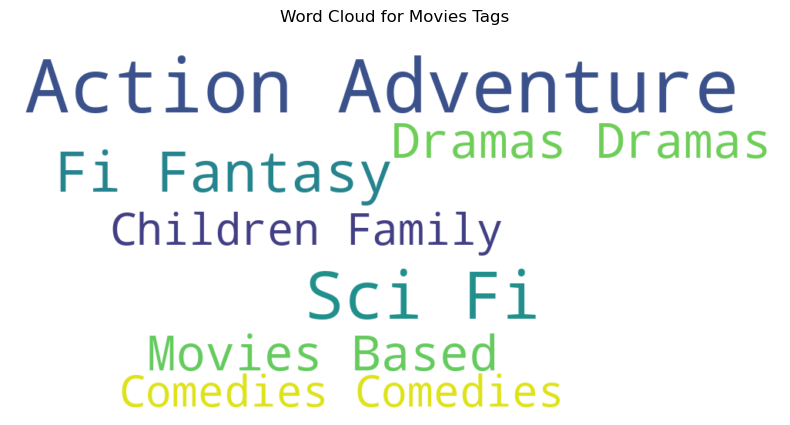

In [29]:
tags_text2 = " ".join(df_movies_tag['Tags'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis',  max_words=7).generate(tags_text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movies Tags')
plt.show()

### The most popular movies tags are:
- Children Family
- Action 
- Adventue
- Comedies
- Dramas

## Languages

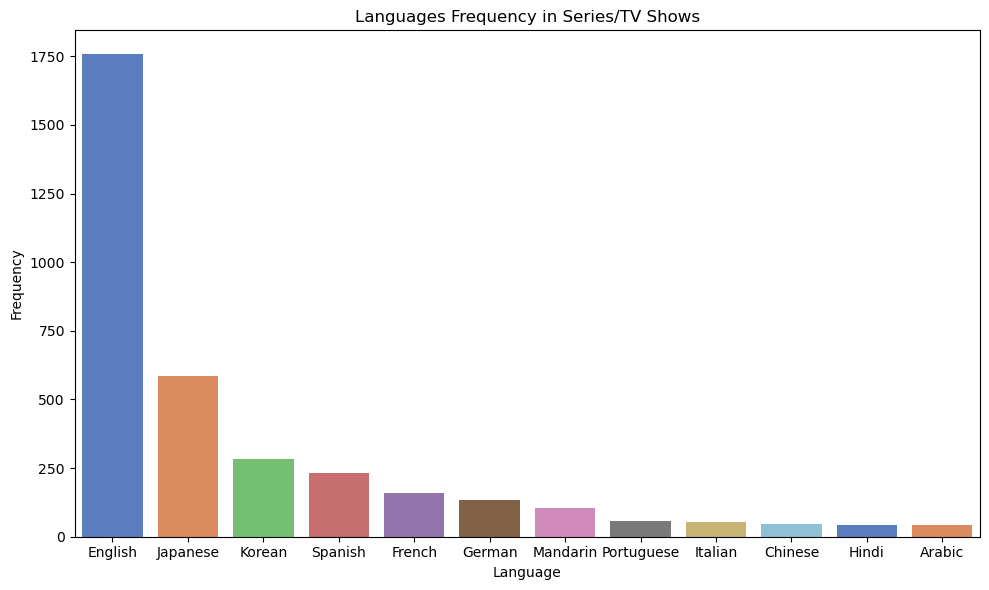

In [30]:
df_lang = df_series['Languages'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
df_languages = df_lang.explode('Languages')

# Группируем данные по языкам и подсчитываем частоту каждого языка
languages_freq = df_languages.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
bubble_df = pd.DataFrame({'Language': languages_freq.index, 'Frequency': languages_freq.values})

top_12 = bubble_df[:12]
top_12_lang = top_12[top_12['Language'] != 'unknown']

plt.figure(figsize=(10, 6))

sns.barplot(x='Language', y= 'Frequency', data=top_12_lang, palette='muted')

plt.title('Languages Frequency in Series/TV Shows')

plt.tight_layout()
plt.show()

### The most popular Series/TV Shows Languages are:
- English
- Japanese
- Korean
- Spanish
- French

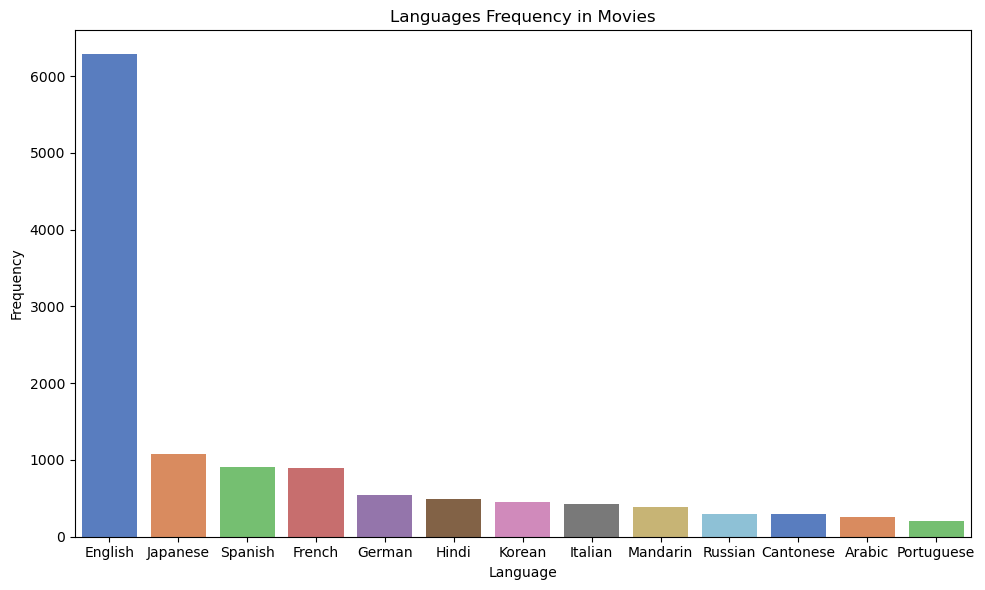

In [31]:
df_lang = df_movie['Languages'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
df_languages = df_lang.explode('Languages')

# Группируем данные по языкам и подсчитываем частоту каждого языка
languages_freq = df_languages.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
bubble_df = pd.DataFrame({'Language': languages_freq.index, 'Frequency': languages_freq.values})

top_10 = bubble_df[:13]
top_10_lang = top_10[top_10['Language'] != 'unknown']

plt.figure(figsize=(10, 6))

sns.barplot(x='Language', y= 'Frequency', data=top_10_lang, palette='muted')

plt.title('Languages Frequency in Movies')

plt.tight_layout()
plt.show()

### The most popular Series/TV Shows Languages are:
- English
- Japanese
- Spanish
- French
- German

## Movies and TV Shows/Series by Hidden Gem Score

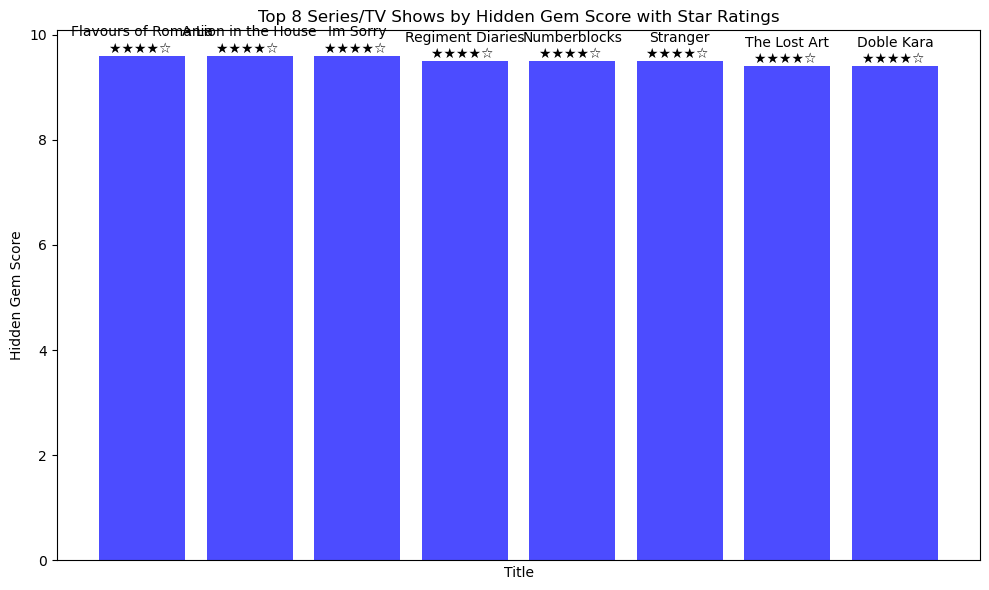

In [60]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Hidden Gem Score' in descending order and take the top 8 rows
top_8 = df_series.sort_values(by='Hidden Gem Score', ascending=False).head(8)

# Create a list of filled star symbols based on the 'Hidden Gem Score'
star_symbols = [f" ☆★★★★"[::-1] for score in top_8['Hidden Gem Score']]

# Build a text-based representation of movie/show titles and star symbols as tooltips
labels = [f"{title}\n{stars}" for title, stars in zip(top_8['Title'], star_symbols)]

# Create the bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_8['Title'], top_8['Hidden Gem Score'], color='b', alpha=0.7)

# Add text labels (stars) above the bars
for i, (title, score) in enumerate(zip(top_8['Title'], top_8['Hidden Gem Score'])):
    plt.text(i, score, labels[i], ha='center', va='bottom', fontsize=10)

# Set the axis labels and title
plt.xlabel('Title')
plt.ylabel('Hidden Gem Score')
plt.title('Top 8 Series/TV Shows by Hidden Gem Score with Star Ratings')

# Remove the x-axis labels
plt.xticks([])

plt.tight_layout()
plt.show()


### The most rated Series/TV Shows are:
- English
- Japanese
- Spanish
- French
- German

In [63]:
# Sort the DataFrame by 'Hidden Gem Score' in descending order and take the top 8 rows
top_8 = df_movie.sort_values(by='Hidden Gem Score', ascending=False).head(8)
top_8
# Function to assign stars based on the rating range
def assign_stars(score):
    if score >= 9.5:
        return ' ★★★★★'
    elif score >= 9.0:
        return ' ★★★★☆'
    elif score >= 8.5:
        return ' ★★★☆☆'
    elif score >= 8.0:
        return ' ★★☆☆☆'
    else:
        return ' ☆☆☆☆☆'

# Create a list of star symbols based on the 'Hidden Gem Score'
star_symbols = [assign_stars(score) for score in top_8['Hidden Gem Score']]

# Build a text-based representation of movie/show titles and star symbols as tooltips
labels = [f"<b>{title}</b><br>{stars}" for title, stars in zip(top_8['Title'], star_symbols)]

# Create the Scatter plot using plotly.graph_objects
fig = go.Figure(data=go.Scatter(x=top_8['Title'], y=top_8['Hidden Gem Score'],
                               mode='markers+text', marker_size=12,
                               text=labels, textposition="top center"))

# Set the font size of the text above the bubbles
fig.update_traces(textfont_size=9)

# Set the axis labels and title
fig.update_layout(title='Top 8 Series by Hidden Gem Score with Star Ratings',
                  yaxis_title='Hidden Gem Score')

# Remove the x-axis labels
fig.update_xaxes(showticklabels=False)

# Show the chart
fig.show()


In [57]:
# Sort the DataFrame by 'Hidden Gem Score' in descending order and take the top 8 rows
top_8 = df_movie.sort_values(by='Hidden Gem Score', ascending=False).head(8)

# Function to assign stars based on the rating range
def assign_stars(score):
    if score >= 9.5:
        return ' ★★★★★'
    elif score >= 9.0:
        return ' ★★★★☆'
    elif score >= 8.5:
        return ' ★★★☆☆'
    elif score >= 8.0:
        return ' ★★☆☆☆'
    else:
        return ' ☆☆☆☆☆'

# Create a list of star symbols based on the 'Hidden Gem Score'
star_symbols = [assign_stars(score) for score in top_8['Hidden Gem Score']]

# Build a text-based representation of movie/show titles and star symbols as tooltips
labels = [f"<b>{title}</b><br>{stars}" for title, stars in zip(top_8['Title'], star_symbols)]

# Create the Scatter plot using plotly.graph_objects
fig = go.Figure(data=go.Scatter(x=top_8['Title'], y=top_8['Hidden Gem Score'],
                               mode='markers+text', marker_size=12,
                               text=labels, textposition="top center"))

# Set the font size of the text above the bubbles
fig.update_traces(textfont_size=9)

# Set the axis labels and title
fig.update_layout(title='Top 8 Movies by Hidden Gem Score with Star Ratings',
                  yaxis_title='Hidden Gem Score')

# Remove the x-axis labels
fig.update_xaxes(showticklabels=False)

fig.show()

## Country Availability

In [35]:
df_series_ctr = df_series.dropna(subset=['Country Availability'])

In [36]:
df_countries = df_series_ctr['Country Availability'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
df_countries_list = df_countries.explode('Languages')

# Группируем данные по языкам и подсчитываем частоту каждого языка
df_countries_freq = df_countries_list.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
countries_num = pd.DataFrame({'Country': df_countries_freq.index, 'Frequency': df_countries_freq.values})
countries_num

,Country,Frequency
0,Malaysia,2203
1,United Kingdom,2185
2,Singapore,2184
3,Thailand,2172
4,India,2146
5,Japan,2129
6,Australia,2077
7,United States,2065
8,South Africa,2062
9,Russia,2010


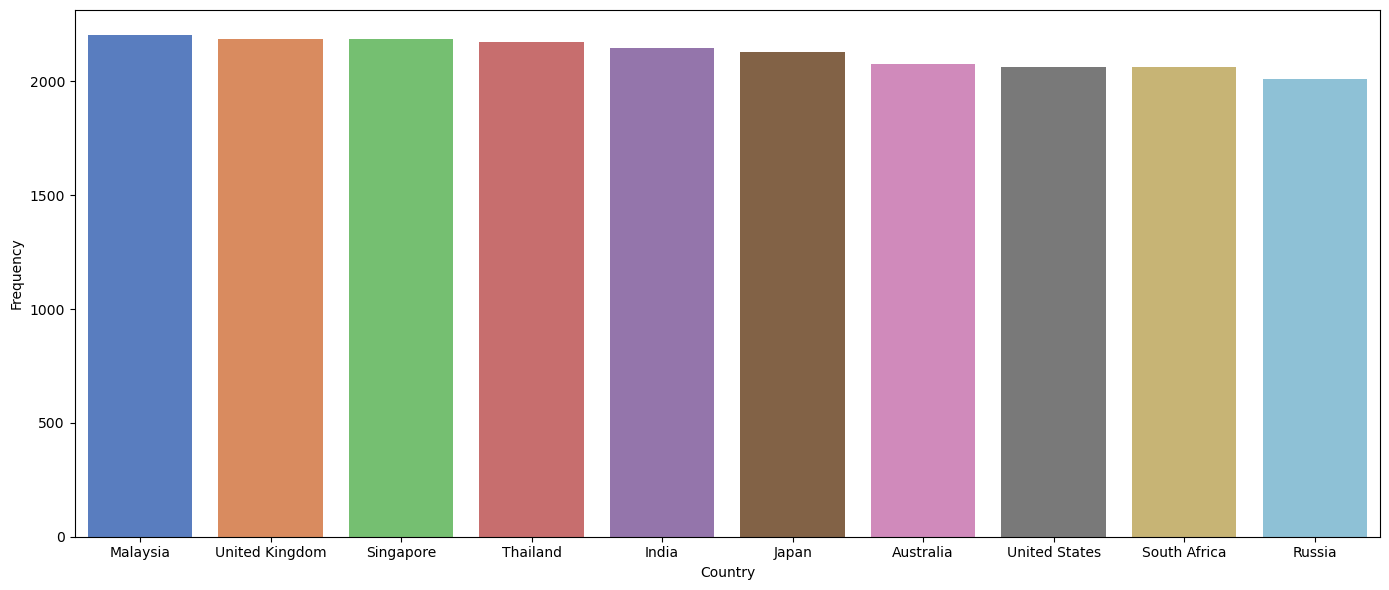

In [37]:
top_10_countries = countries_num[:10]

plt.figure(figsize=(14, 6))

sns.barplot(x='Country', y= 'Frequency', data=top_10_countries, palette='muted')
plt.tight_layout()
plt.show()

In [38]:
df_series_ctr = df_movie.dropna(subset=['Country Availability'])

df_countries = df_series_ctr['Country Availability'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
df_countries_list = df_countries.explode('Languages')

# Группируем данные по языкам и подсчитываем частоту каждого языка
df_countries_freq = df_countries_list.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
countries_num = pd.DataFrame({'Country': df_countries_freq.index, 'Frequency': df_countries_freq.values})
countries_num

,Country,Frequency
0,Czech Republic,4241
1,United Kingdom,4126
2,Hungary,3996
3,Japan,3986
4,Canada,3933
5,Romania,3872
6,Slovakia,3818
7,Australia,3743
8,Thailand,3704
9,Singapore,3692


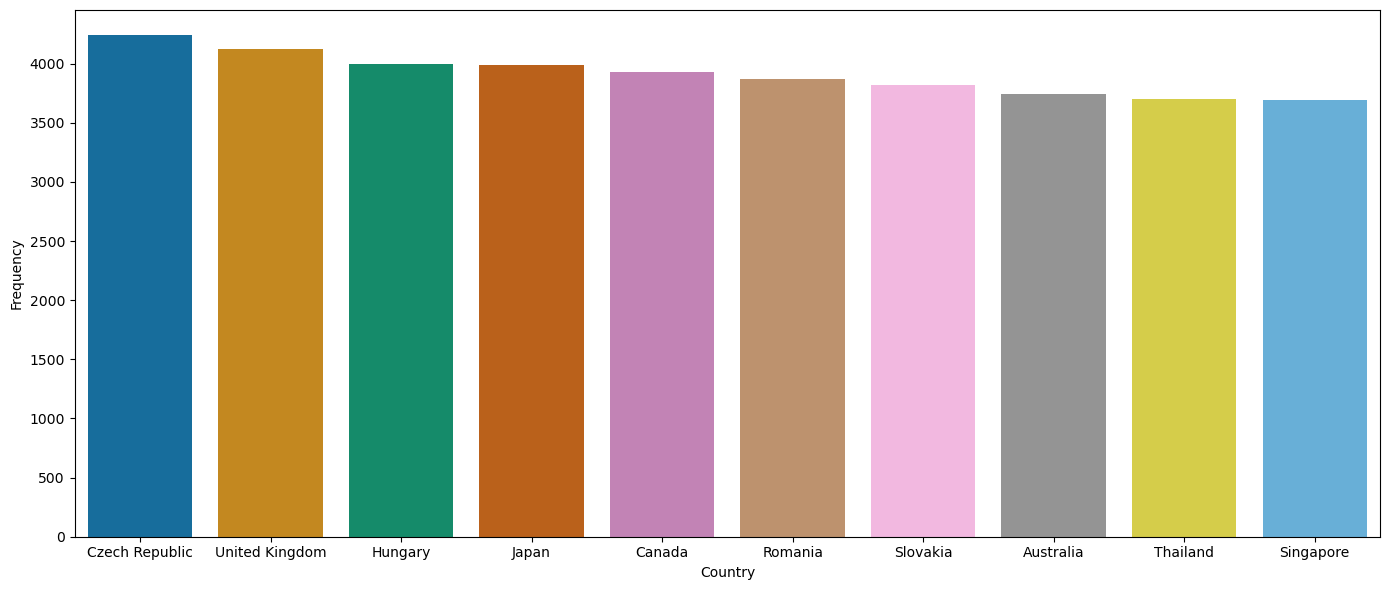

In [39]:
top_10_countries = countries_num[:10]

plt.figure(figsize=(14, 6))

sns.barplot(x='Country', y= 'Frequency', data=top_10_countries, palette='colorblind')
plt.tight_layout()
plt.show()

## Runtime

In [40]:
df_series_drt = df_series.dropna(subset=['Runtime'])
df_series_drt['Runtime'].value_counts()

< 30 minutes    3782
Name: Runtime, dtype: int64

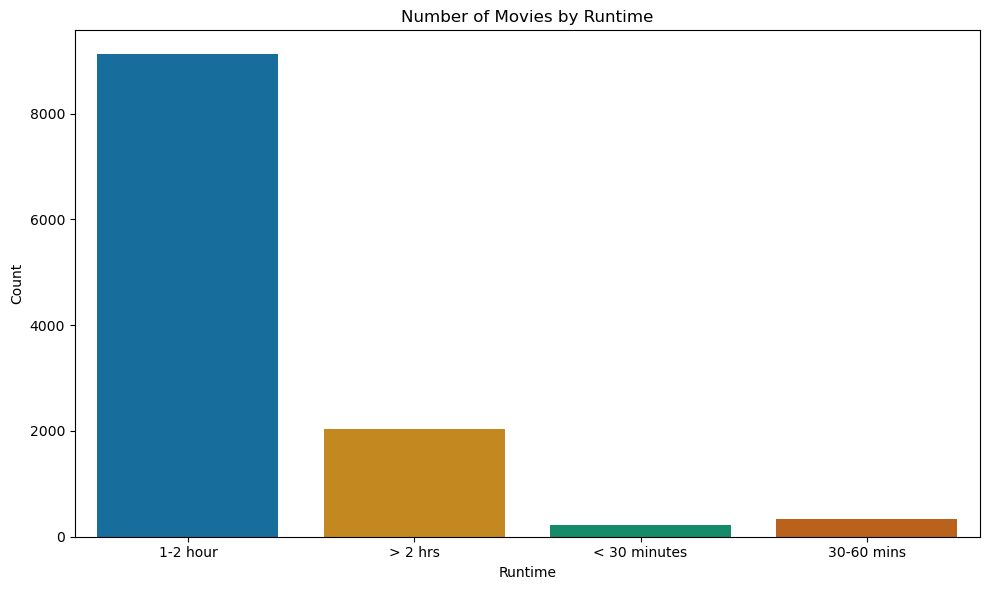

In [41]:
df_movie_drt = df_movie.dropna(subset=['Runtime'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Runtime', data=df_movie_drt, palette='colorblind')

plt.ylabel('Count')
plt.title('Number of Movies by Runtime')

plt.tight_layout()
plt.show()

## Directors and actors

In [42]:
df_series_dir = df_series.dropna(subset=['Director'])

list_directors = df_series_dir['Director'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
list_directors = list_directors.explode('Languages')

# Группируем данные по языкам и подсчитываем частоту каждого языка
df_directors_freq = list_directors.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
directors_num = pd.DataFrame({'Director': df_directors_freq.index, 'Frequency': df_directors_freq.values})

top10_directors = directors_num[0:10]

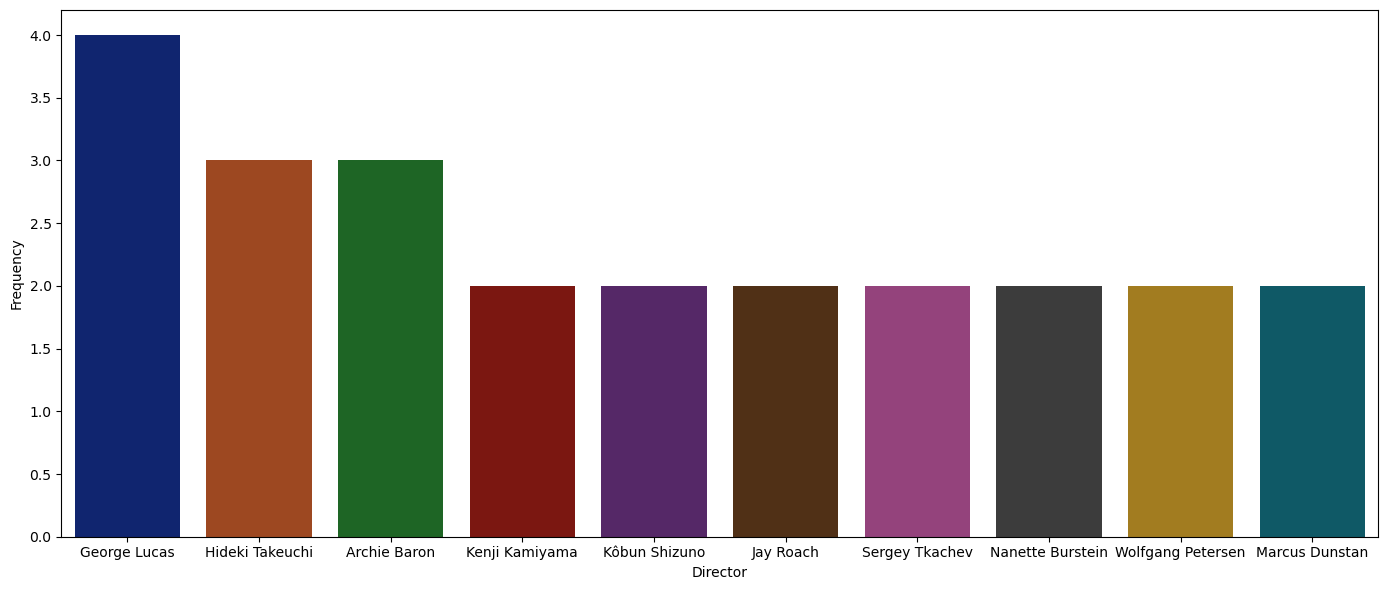

In [43]:
plt.figure(figsize=(14, 6))

sns.barplot(x='Director', y= 'Frequency', data=top10_directors, palette='dark')
plt.tight_layout()
plt.show()

In [44]:
df_series_act = df_series.dropna(subset=['Actors'])

list_actors = df_series_act['Actors'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
list_actors = list_actors.explode('Actors')

# Группируем данные по языкам и подсчитываем частоту каждого языка
list_actors_freq = list_actors.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
df_actors_num = pd.DataFrame({'Actor': list_actors_freq.index, 'Frequency': list_actors_freq.values})

top10_actors = df_actors_num[0:10]

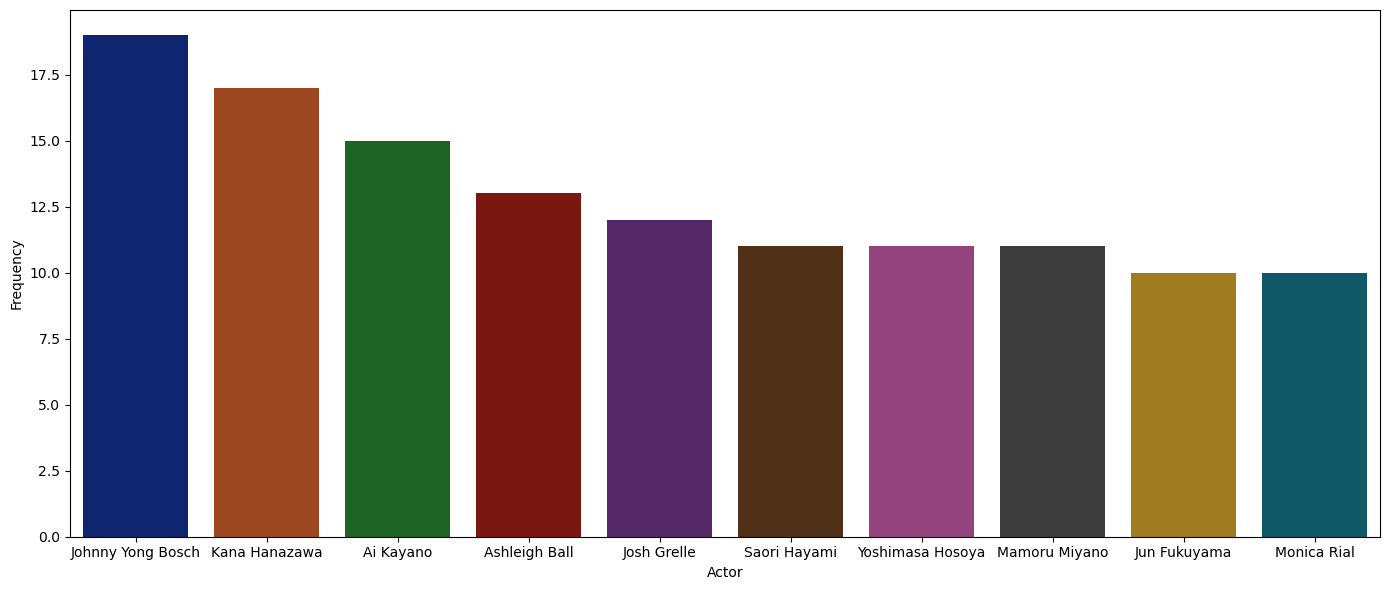

In [45]:
plt.figure(figsize=(14, 6))

sns.barplot(x='Actor', y= 'Frequency', data=top10_actors, palette='dark')
plt.tight_layout()
plt.show()

In [46]:
df_movie_dir = df_movie.dropna(subset=['Director'])

list_directors = df_movie_dir['Director'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
list_directors = list_directors.explode('Languages')

# Группируем данные по языкам и подсчитываем частоту каждого языка
df_directors_freq = list_directors.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
directors_num = pd.DataFrame({'Director': df_directors_freq.index, 'Frequency': df_directors_freq.values})

top10_directors = directors_num[0:10]

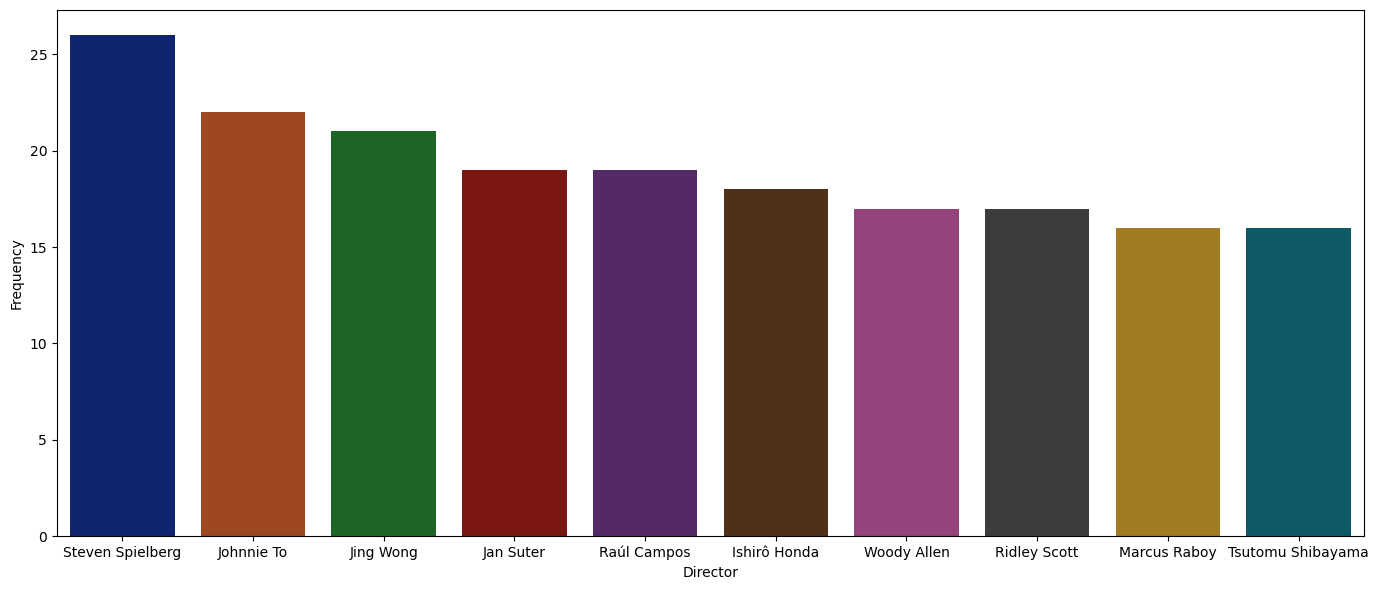

In [47]:
plt.figure(figsize=(14, 6))

sns.barplot(x='Director', y= 'Frequency', data=top10_directors, palette='dark')
plt.tight_layout()
plt.show()

In [48]:
df_movie_act = df_movie.dropna(subset=['Actors'])

list_actors = df_movie_act['Actors'].str.split(',')

# Создаем новый DataFrame, в котором каждый язык представлен отдельной строкой
list_actors = list_actors.explode('Actors')

# Группируем данные по языкам и подсчитываем частоту каждого языка
list_actors_freq = list_actors.str.strip().value_counts()

# Создаем DataFrame с информацией о языках и их частоте
df_actors_num = pd.DataFrame({'Actor': list_actors_freq.index, 'Frequency': list_actors_freq.values})

top10_actors = df_actors_num[0:10]

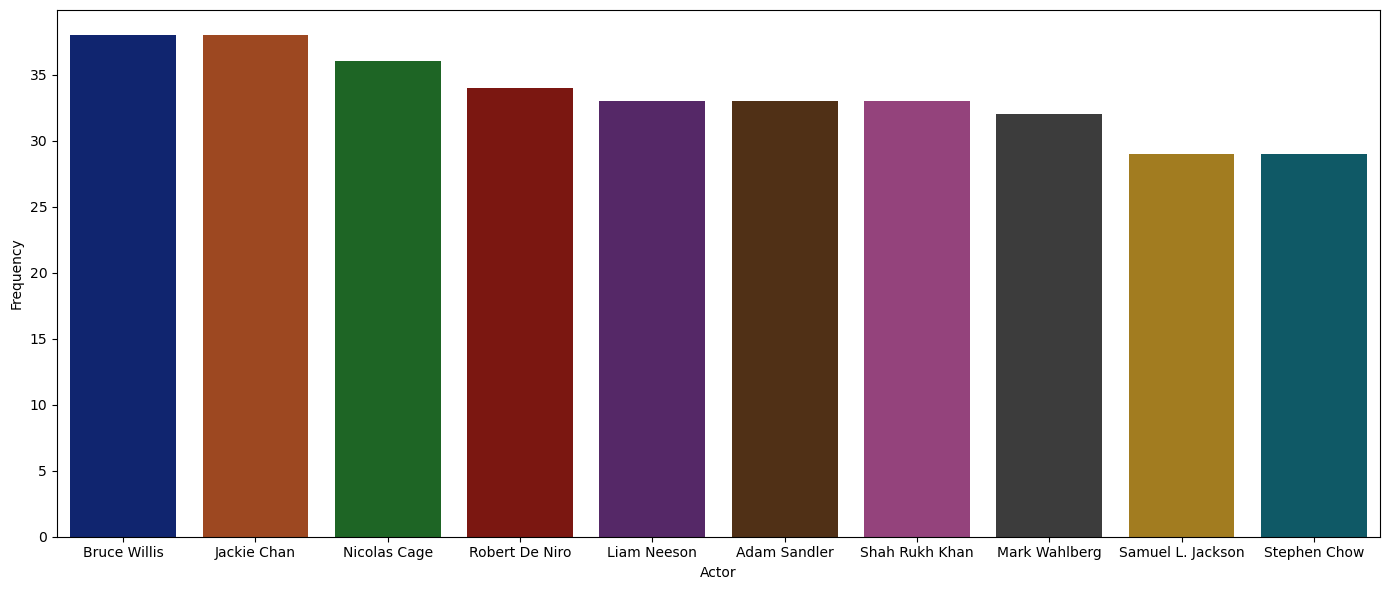

In [49]:
plt.figure(figsize=(14, 6))

sns.barplot(x='Actor', y= 'Frequency', data=top10_actors, palette='dark')
plt.tight_layout()
plt.show()

## The most rated by IMDb and Rotten Tomatoes

In [41]:
df_series_imdb = df_series.dropna(subset=['IMDb Score'])
df_series_imdb = df_series_imdb.sort_values(by = 'IMDb Score', ascending = False)
top10_ser_imdb = df_series_imdb[:10]

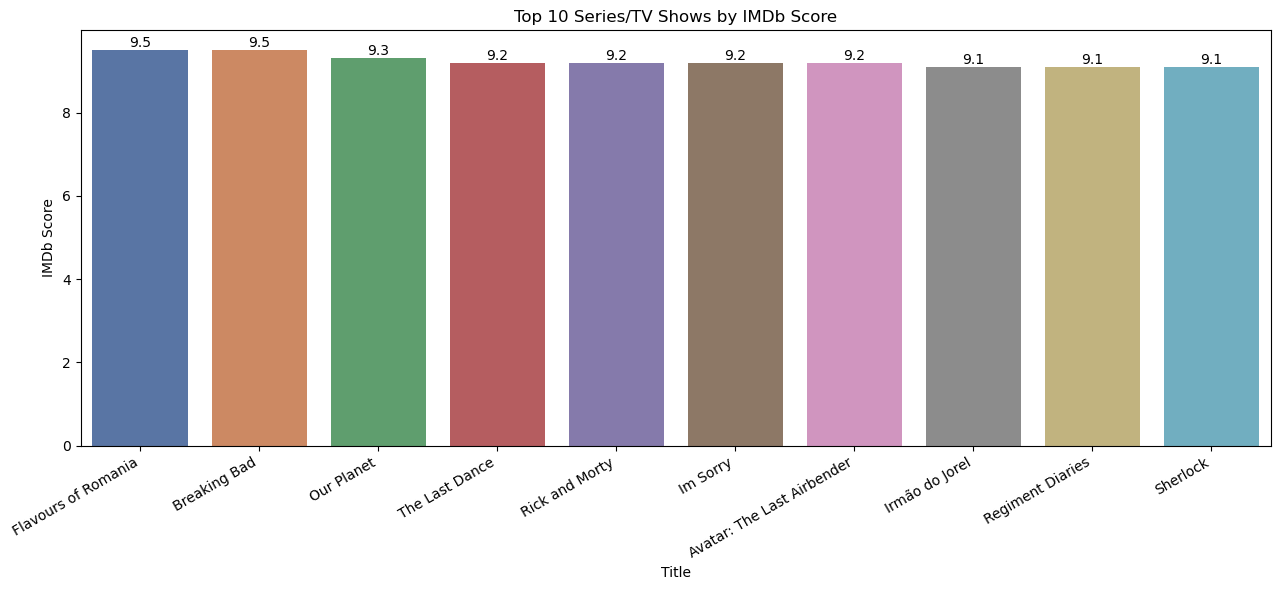

In [43]:
plt.figure(figsize=(13, 6))

sns.barplot(x='Title', y='IMDb Score', data=top10_ser_imdb, palette='deep',
            ax=plt.gca())  # Use plt.gca() to get the current axes

# IMDb Score as text on each bar
for index, value in enumerate(top10_ser_imdb['IMDb Score']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Title')
plt.ylabel('IMDb Score')
plt.title('Top 10 Series/TV Shows by IMDb Score')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [44]:
df_series_rt = df_series.dropna(subset=['Rotten Tomatoes Score'])
df_series_rt = df_series_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)
top10_rt = df_series_rt[:10]

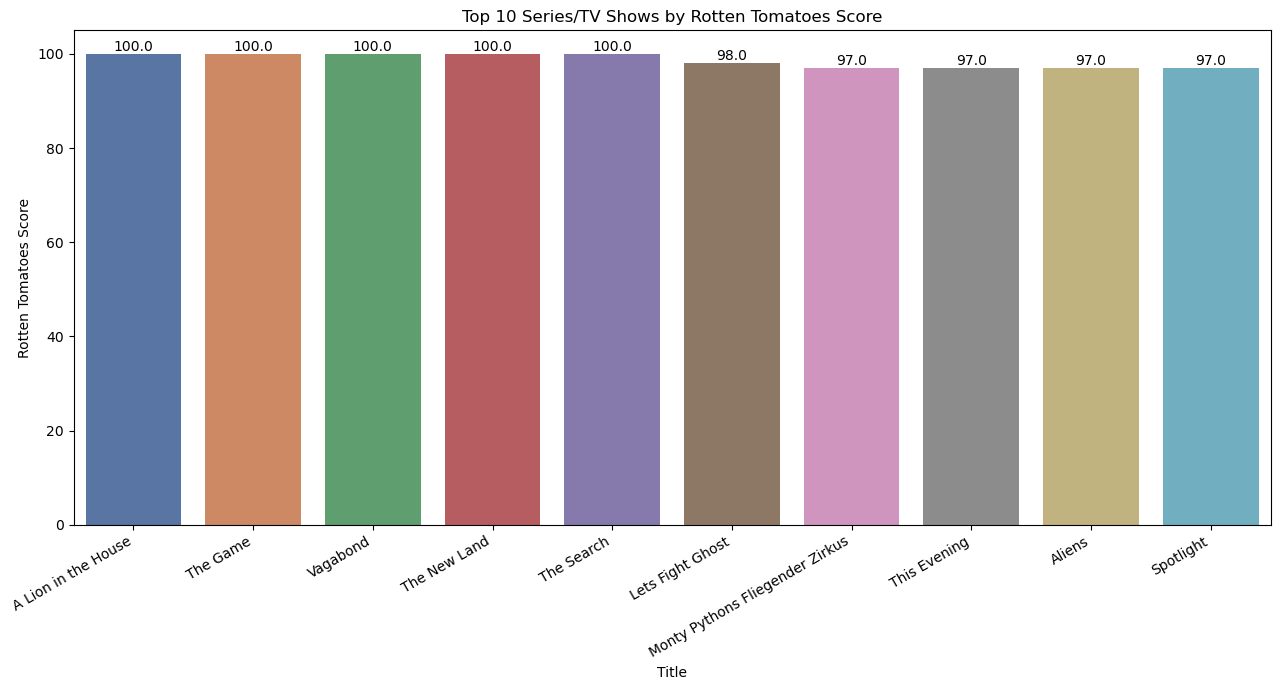

In [45]:
plt.figure(figsize=(13, 7))

# Bar plot with Rotten Tomatoes Score displayed on top of the bars
sns.barplot(x='Title', y='Rotten Tomatoes Score', data=top10_rt, palette='deep',
            ax=plt.gca())  # Use plt.gca() to get the current axes

# Rotten Tomatoes Score as text on each bar
for index, value in enumerate(top10_rt['Rotten Tomatoes Score']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Title')
plt.ylabel('Rotten Tomatoes Score')
plt.title('Top 10 Series/TV Shows by Rotten Tomatoes Score')

# Add rotation to x-axis labels (titles)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [46]:
df_movie_imdb = df_movie.dropna(subset=['IMDb Score'])
df_movie_imdb = df_movie_imdb.sort_values(by = 'IMDb Score', ascending = False)
top10_mov_imdb = df_movie_imdb[:10]

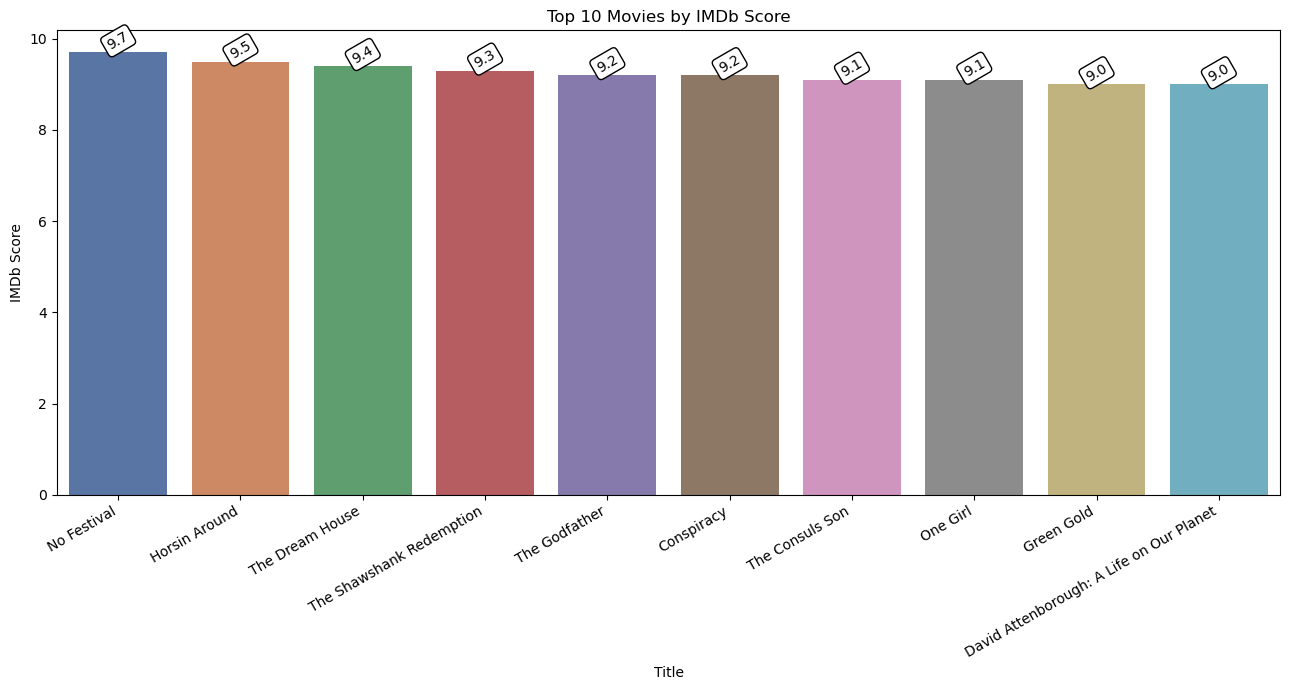

In [48]:
plt.figure(figsize=(13, 7))

# The bar plot with IMDb Score displayed on top of the bars
sns.barplot(x='Title', y='IMDb Score', data=top10_mov_imdb, palette='deep',
            ax=plt.gca())  # Use plt.gca() to get the current axes

# IMDb Score as text directly above each bar with a vertical offset
for index, value in enumerate(top10_mov_imdb['IMDb Score']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
             verticalalignment='bottom', rotation=30)

plt.xlabel('Title')
plt.ylabel('IMDb Score')
plt.title('Top 10 Movies by IMDb Score')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [49]:
df_movie_rt = df_movie.dropna(subset=['Rotten Tomatoes Score'])
df_movie_rt = df_movie_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)
top10_mov_rt = df_movie_rt[:10]
top10_mov_rt['Rotten Tomatoes Score']

11355    100.0
9273     100.0
1855     100.0
9294     100.0
6247     100.0
11976    100.0
6231     100.0
11379    100.0
6212     100.0
10699    100.0
Name: Rotten Tomatoes Score, dtype: float64

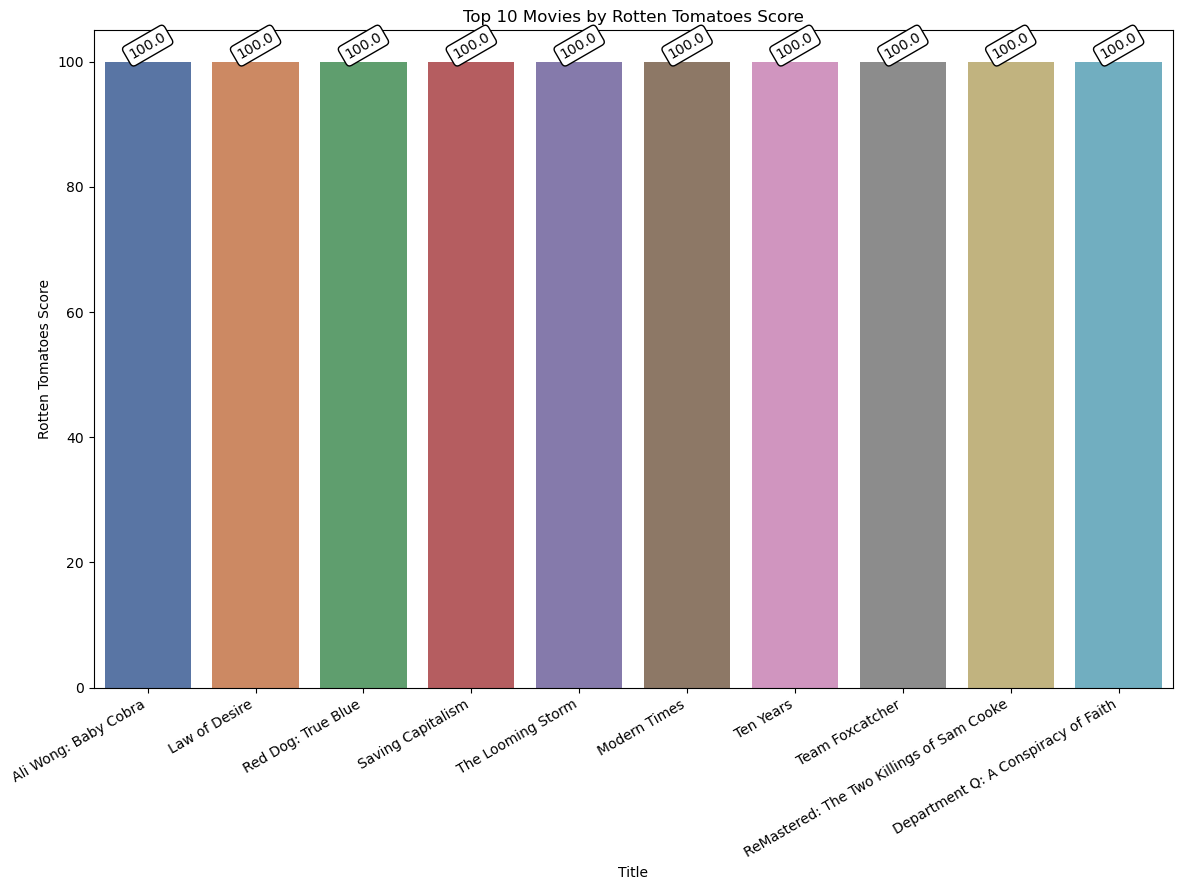

In [50]:
plt.figure(figsize=(12, 9))

# Create the bar plot with Rotten Tomatoes Score displayed on top of the bars
sns.barplot(x='Title', y='Rotten Tomatoes Score', data=top10_mov_rt, palette='deep',
            ax=plt.gca())  # Use plt.gca() to get the current axes

# Add the Rotten Tomatoes Score as text directly above each bar with a vertical offset
for index, value in enumerate(top10_mov_rt['Rotten Tomatoes Score']):
    if not pd.isnull(value):  # Check if the value is not NaN
        plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 verticalalignment='bottom', rotation=30)

plt.xlabel('Title')
plt.ylabel('Rotten Tomatoes Score')
plt.title('Top 10 Movies by Rotten Tomatoes Score')

# Add rotation to x-axis labels (titles)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


## Top 15 Tv Series and Movie for awards received

In [51]:
df_series_awr = df_series.dropna(subset=['Awards Received'])
df_series_awr = df_series_awr.sort_values(by = 'Awards Received', ascending = False)
top15_ser_awr = df_series_awr[:15]

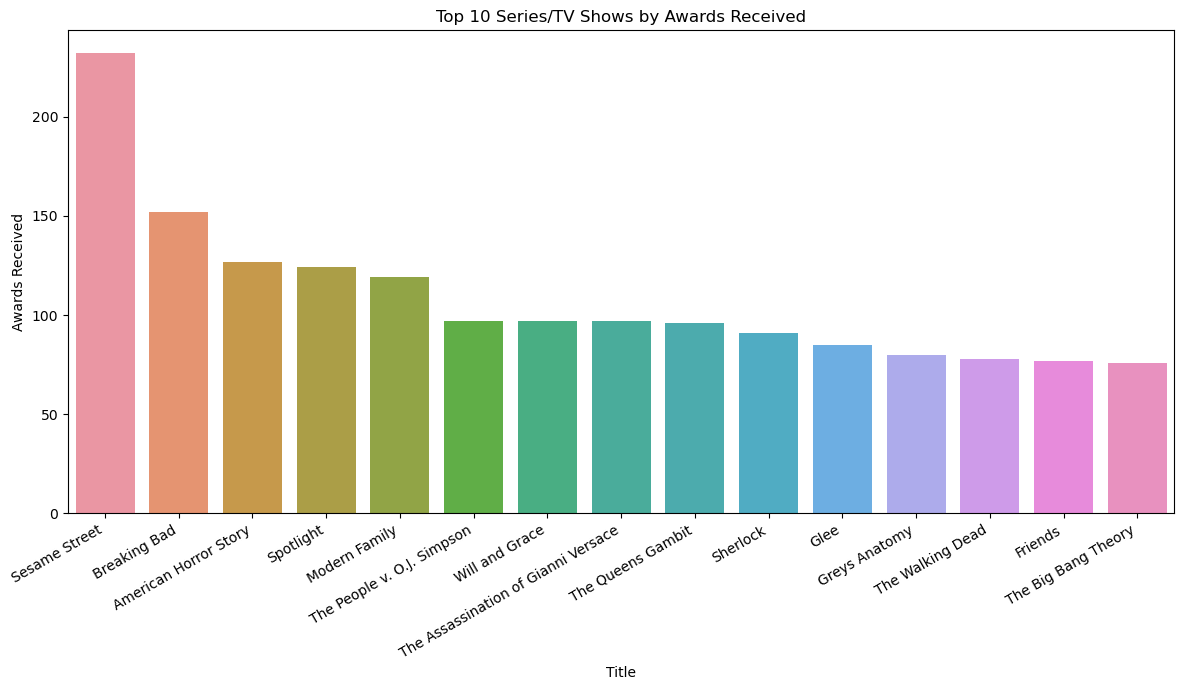

In [52]:
plt.figure(figsize=(12, 7))

# Create the bar plot with Rotten Tomatoes Score displayed on top of the bars
sns.barplot(x='Title', y='Awards Received', data=top15_ser_awr,
            ax=plt.gca())  # Use plt.gca() to get the current axes

plt.xlabel('Title')
plt.ylabel('Awards Received')
plt.title('Top 10 Series/TV Shows by Awards Received')

# Add rotation to x-axis labels (titles)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [53]:
df_mov_awr = df_movie.dropna(subset=['Awards Received'])
df_mov_awr = df_mov_awr.sort_values(by = 'Awards Received', ascending = False)
top15_mov_awr = df_mov_awr[:15]

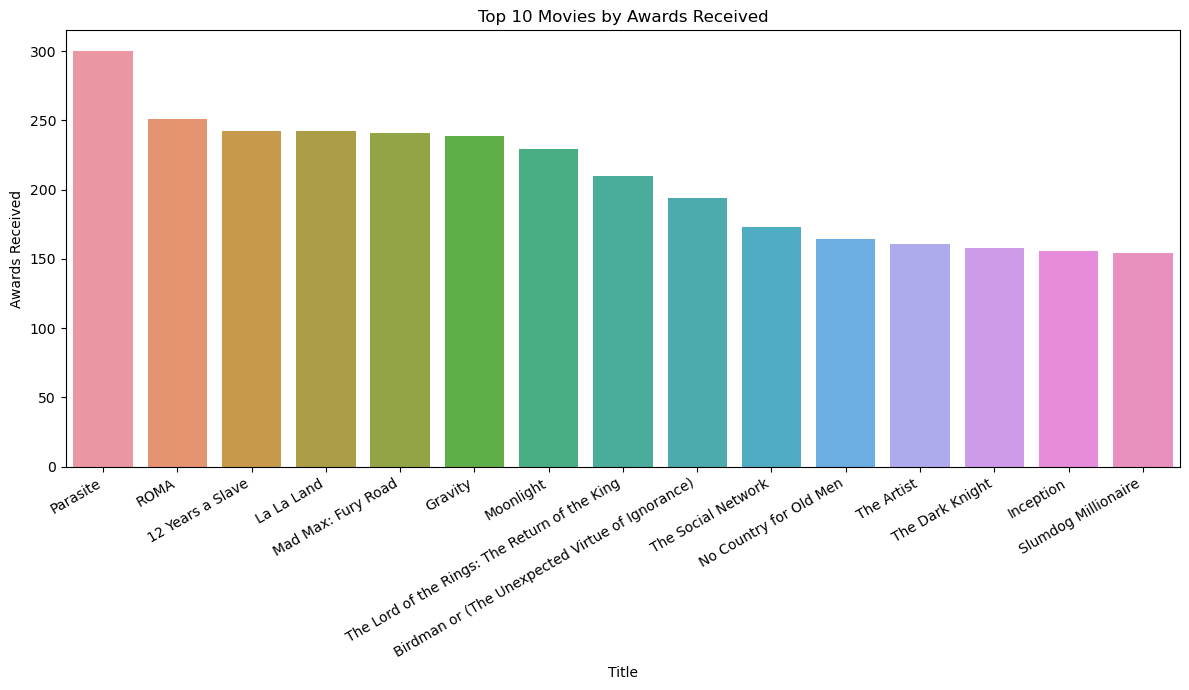

In [54]:
plt.figure(figsize=(12, 7))

# Create the bar plot with Rotten Tomatoes Score displayed on top of the bars
sns.barplot(x='Title', y='Awards Received', data=top15_mov_awr,
            ax=plt.gca())  # Use plt.gca() to get the current axes

plt.xlabel('Title')
plt.ylabel('Awards Received')
plt.title('Top 10 Movies by Awards Received')

# Add rotation to x-axis labels (titles)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()